# Contents

This is a notebook that imports the robots libraries and a bunch of useful stuff

I use this to perform explorative sessions when debugging/testing some aspects of the library

Feel free to reuse this at the exam!

(remember to use the pdm provided .venv on the top right corner of the notebook)

In [1]:
import pyrobots as pr
import numpy as np
from rich import print


In [2]:
import numpy as np

In [3]:
angle = -30

angles_rad = np.deg2rad(angle)

In [4]:
angles_rad

-0.5235987755982988

In [5]:
def is_skew_symmetric_matrix(A):
    return np.allclose(A.T, -A)

In [6]:
A = pr.rotations.direct_rot_mat(np.pi, np.array([1,0,0]))

In [7]:
O , S= pr.direct_generic(("y", "x", "y"), (np.pi/2, -np.pi/4, np.pi/4), get_symbolic=True)
R = pr.rotations.direct_rot_mat(angles_rad, np.array([1/np.sqrt(3),-1/np.sqrt(3),1/np.sqrt(3)]))

In [8]:
A = pr.rotations.gen_pitch("t")
a = A.subs({"t": np.pi/2})

In [9]:
B = pr.rotations.gen_roll("phi_1")
b = B.subs("phi_1", -np.pi/4)

In [10]:
C = pr.rotations.gen_pitch("theta_2")
c = C.subs("theta_2", np.pi/4)

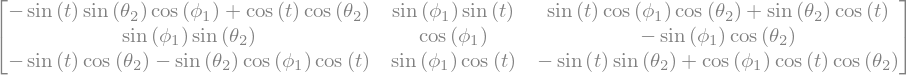

In [11]:
Z = A @ B @ C
Z

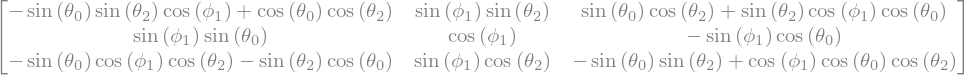

In [12]:
O , S = pr.direct_generic(("y", "x", "y"), (np.pi/2, -np.pi/4, np.pi/4), get_symbolic=True)
S

In [13]:
np.array(a @ b @ c)

array([[-0.500000000000000, -0.707106781186547, 0.500000000000000],
       [-0.500000000000000, 0.707106781186548, 0.500000000000000],
       [-0.707106781186548, -4.32978028117747e-17, -0.707106781186547]],
      dtype=object)

In [14]:
O

array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
       [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01],
       [-7.07106781e-01, -4.32978028e-17, -7.07106781e-01]])

In [15]:
Initial = np.linalg.inv(R) @ O

In [16]:
Initial

array([[-0.1161291 , -0.87965281,  0.46122116],
       [-0.34164801,  0.47140452,  0.81305253],
       [-0.93262569, -0.06315623, -0.35527542]])

In [17]:
np.linalg.det(Initial)

In [18]:
np.allclose(np.dot(R.T, R), np.eye(3))

True

In [19]:
pr.rotations.inverse_rpy(
    Initial
)

((-2.965663515564169, 1.2016222258862326, -1.898452923708797, None),
 (0.17592913802562457, 1.9399704277035608, 1.243139729880996, None))

In [20]:
Rf = np.array(
    [
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, -1]
    ]
)

Ri = np.array(
    [
        [0, 1, 0],
        [0.5, 0, np.sqrt(3)/2],
        [np.sqrt(3)/2, 0, -0.5]
    ]
)


In [21]:
res = Ri.T @ Rf

In [22]:
res

array([[ 0.       , -0.5      , -0.8660254],
       [ 1.       ,  0.       ,  0.       ],
       [ 0.       , -0.8660254,  0.5      ]])

$$\theta = 1.8235 \\
x = \begin{bmatrix}-0.4472, -0.4472, 0.7746\end{bmatrix}$$

In [23]:
ax = np.array([-0.4472, -0.4472, 0.7746])

In [24]:
np.sqrt(2)/2

In [25]:
M = np.array(
    [
        [-np.sqrt(2)/2, 0.5, -0.5, -1],
        [-np.sqrt(2)/2, -0.5, 0.5, -1],
        [0, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2],
        [0, 0, 0, 1]
    ]
)

In [26]:
M

array([[-0.70710678,  0.5       , -0.5       , -1.        ],
       [-0.70710678, -0.5       ,  0.5       , -1.        ],
       [ 0.        ,  0.70710678,  0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [27]:
# recover denavit hartenberg parameters
2
alpha = np.arctan2(M[2,1], M[2,2])
theta = np.arctan2(M[0, 1], M[0,0])
d = M[2, 3]
a = M[0, 3] * np.cos(theta) + M[1, 3] * np.sin(theta)

In [28]:
np.arctan2(M[0, 1], M[0,0])

In [29]:
M[0, 1], M[0,0]

In [30]:
- (3 * np.pi)/4

In [31]:
alpha, theta, d, a 

In [32]:
(-3 * np.pi) / 4

In [33]:
pr.direct_generic(("z", "y", "x"), (-np.pi/2, -np.pi/4, np.pi/4), get_symbolic=True)

(array([[ 4.32978028e-17,  7.07106781e-01, -7.07106781e-01],
        [-7.07106781e-01,  5.00000000e-01,  5.00000000e-01],
        [ 7.07106781e-01,  5.00000000e-01,  5.00000000e-01]]),
 Matrix([
 [                                   cos(psi_0)*cos(theta_1),                                    -sin(psi_0)*cos(theta_1),             sin(theta_1)],
 [sin(phi_2)*sin(theta_1)*cos(psi_0) + sin(psi_0)*cos(phi_2), -sin(phi_2)*sin(psi_0)*sin(theta_1) + cos(phi_2)*cos(psi_0), -sin(phi_2)*cos(theta_1)],
 [sin(phi_2)*sin(psi_0) - sin(theta_1)*cos(phi_2)*cos(psi_0),  sin(phi_2)*cos(psi_0) + sin(psi_0)*sin(theta_1)*cos(phi_2),  cos(phi_2)*cos(theta_1)]]))

In [34]:
Ri = np.matrix([
    [0,1,0],
    [1/2,0,np.sqrt(3)/2],
    [np.sqrt(3)/2,0,-1/2]
])

Rf = np.matrix([
    [1,0,0],
    [0,-1,0],
    [0,0,-1]
])

R = Ri.T @ Rf

In [35]:
R

matrix([[ 0.       , -0.5      , -0.8660254],
        [ 1.       ,  0.       ,  0.       ],
        [ 0.       , -0.8660254,  0.5      ]])

In [36]:
Ri @ np.array([-0.4472, -0.4472, 0.7746])

matrix([[-0.4472    ,  0.44722328, -0.77458656]])

In [37]:
dh_table = np.array([
    ["0", "0", "q1", "0"],
    ["N", "-pi/2", "0", "q2"],
    ["0", "0", "q3", "0"],
    ["0", "0", "0", "q4"]
])

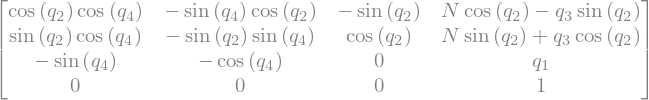

In [38]:
pr.den_hart.mat_dh_symbolic(dh_table)

In [39]:
from sympy import symbols, Eq, solve, Matrix, cos, sin, pprint, I, init_printing, atan2

init_printing()

# Define symbolic variables
q1, q2, q3 = symbols("q1 q2 q3")

# Define symbolic matrices
N = symbols("N", positive=True)
A = Matrix([
    [N, -q3, 0],
    [q3, N, 0],
    [0, 0, 1]
])

x = Matrix([
    [cos(q2)],
    [sin(q2)],
    [q1]
])

p = Matrix([
    0, 2, 1.5])

# Set up the equation
equation = Eq(A * x, p)
constraints = (Eq(x[0]**2 + x[1]**2, 1), Eq(x[2], p[2])) # x^2 + y^2 = 1, z = 1.5



# Solve for parameters
sol = solve([equation, *constraints], [q1, q2, q3])



In [40]:
# kramer 

M1 = Matrix([
    [cos(q2), -q3, 0],
    [sin(q2), N, 0],
    [q1, 0, 1]
])

M2 = Matrix([
    [N, cos(q2), 0],
    [q3, sin(q2), 0],
    [0, q1, 1]
])

M3 = Matrix([
    [N, -q3, cos(q2)],
    [q3, N, sin(q2)],
    [0, 0, q1]
])


In [41]:
M1.det()

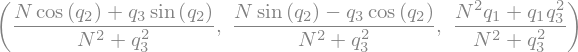

In [42]:
M1.det() / A.det(), M2.det() / A.det(), M3.det() / A.det()

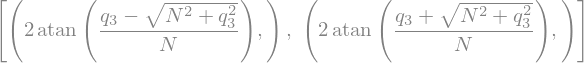

In [43]:
solve((M1.det() / A.det(), M2.det() / A.det(), M3.det() / A.det()), [q2])

$$p_x = l_1 c_1 + l_2 c_{12}$$
$$p_y = l_1 s_1 + l_2 s_{12}$$

Squaring and summing the two equations we get:

$$p_x^2 + p_y^2 - l_1^2 - l_2^2 = 2 l_1 l_2 c_{12}$$

In [56]:
Rw = pr.direct_rot_mat(np.pi/2, np.array([0,0,1]))
Rtool = pr.direct_rot_mat(-np.pi/2, np.array([1,0,0]))

In [57]:
Tw = np.array([
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
], dtype=np.float64)

Tw[:3, :3] = Rw @ Tw[:3, :3]


In [58]:
Te = np.array([
    [0, 1/2, -np.sqrt(3)/2, 1],
    [1, 0, 0, -3/4],
    [0, -np.sqrt(3)/2, -1/2, 1.5],
    [0, 0, 0, 1]
], dtype=np.float64)

In [59]:
Ttool = np.array([
    [1,0,0,0],
    [0,1,0,0.3],
    [0,0,1,0.3],
    [0,0,0,1]
], dtype=np.float64)

Ttool[:3, :3] = Rtool @ Ttool[:3, :3]

In [60]:
wTtool = Tw @ Te @ Ttool

In [63]:
print(np.array2string(wTtool, precision=3, suppress_small=True))

[[-1.     0.     0.     1.75 ]
 [ 0.     0.866  0.5    1.89 ]
 [ 0.     0.5   -0.866  1.09 ]
 [ 0.     0.     0.     1.   ]]

In [1]:
import numpy as np

In [2]:
L = 1
Px = 2
Py = 1
alpha = np.pi/6

In [22]:
delta = (Px * np.cos(alpha) + Py * np.sin(alpha)) ** 2 - (Px ** 2 + Py ** 2 - L ** 2)

In [23]:
delta

0.9820508075688767

In [24]:
b = (Px * np.cos(alpha) + Py * np.sin(alpha))

In [34]:
q3_1 = b + np.sqrt(delta)

In [35]:
q3_1

3.2230355741363947

In [36]:
q3_2 = b - np.sqrt(delta)

In [37]:
q3_2

1.2410660410013599

In [38]:
P = np.array([Px, Py])

In [39]:
L2 = np.array([
    q3_1 * np.cos(alpha),
    q3_1 * np.sin(alpha)
])

L1 = P - L2

q1_1 = np.arctan2(L1[1], L1[0])

In [40]:
q2_1 = alpha - q1_1

In [41]:
L2 = np.array([
    q3_2 * np.cos(alpha),
    q3_2 * np.sin(alpha)
])

L1 = P - L2

q1_2 = np.arctan2(L1[1], L1[0])

In [42]:
q2_2 = alpha - q1_2

In [43]:
(q1_1, q2_1, q3_1), (q1_2, q2_2, q3_2)

((-2.4836152202297495, 3.007213995828048, 3.2230355741363947),
 (0.38922011783655397, 0.13437865776174485, 1.2410660410013599))